In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set(style='white')

In [3]:
user1=pd.read_csv('train_users_2.csv',dtype={'age':'float'})
user2=pd.read_csv('test_users.csv',dtype={'age':'float'})
session=pd.read_csv('sessions.csv')
agb=pd.read_csv('age_gender_bkts.csv')

In [4]:
user=pd.concat([user1,user2])
user.sample(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
151650,b0i4s91nna,2014-02-11,20140211052811,2014-02-21,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Firefox,US
195526,scfq043htx,2014-05-27,20140527163056,2014-06-14,MALE,42.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,other
26085,8kr4btkplp,2012-05-31,20120531225952,NaN,FEMALE,21.0,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Safari,NDF
207210,qxune7g7ju,2014-06-19,20140619180620,NaN,MALE,48.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,NDF
107548,uaydv8gp0r,2013-09-14,20130914145645,2013-09-14,FEMALE,22.0,basic,0,en,other,other,untracked,Web,Mac Desktop,Chrome,other
38350,n02x2ij2x5,2012-08-28,20120828011122,NaN,FEMALE,28.0,facebook,12,en,api,other,linked,Web,Mac Desktop,Safari,NDF
22899,lvwt7oq1xd,2014-08-02,20140802215334,NaN,-unknown-,NaN,basic,0,en,direct,direct,product,Web,Mac Desktop,Chrome,NaN
136054,tblv01e3ke,2013-12-28,20131228202152,2013-12-30,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,US
180264,y3yhfpho2i,2014-04-25,20140425042353,NaN,FEMALE,28.0,facebook,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
202530,7ewag3yl9o,2014-06-10,20140610180610,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [5]:
session.head(100)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
95,d1mm9tcy42,show,NaN,NaN,Windows Desktop,38.0
96,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,917.0
97,d1mm9tcy42,show,view,p3,Windows Desktop,130462.0
98,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,443.0


## Aim of the analysis:
1. User profile: age/gender/destination/sign_up method/device_type
2. Which channel is the most effective one? 
3. User behaviour analysis
4. funnel analysis: all users--active users

### Data cleaning

In [6]:
# any null 
user.isnull().sum()
session.isnull().sum()
# how to explain 

# any duplicates 
user.duplicated().any()
session.duplicated().sum()
# There are 252536 duplicates
session.drop_duplicates(inplace=True)


In [7]:
# data type 
user.dtypes


id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

### User Profile 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


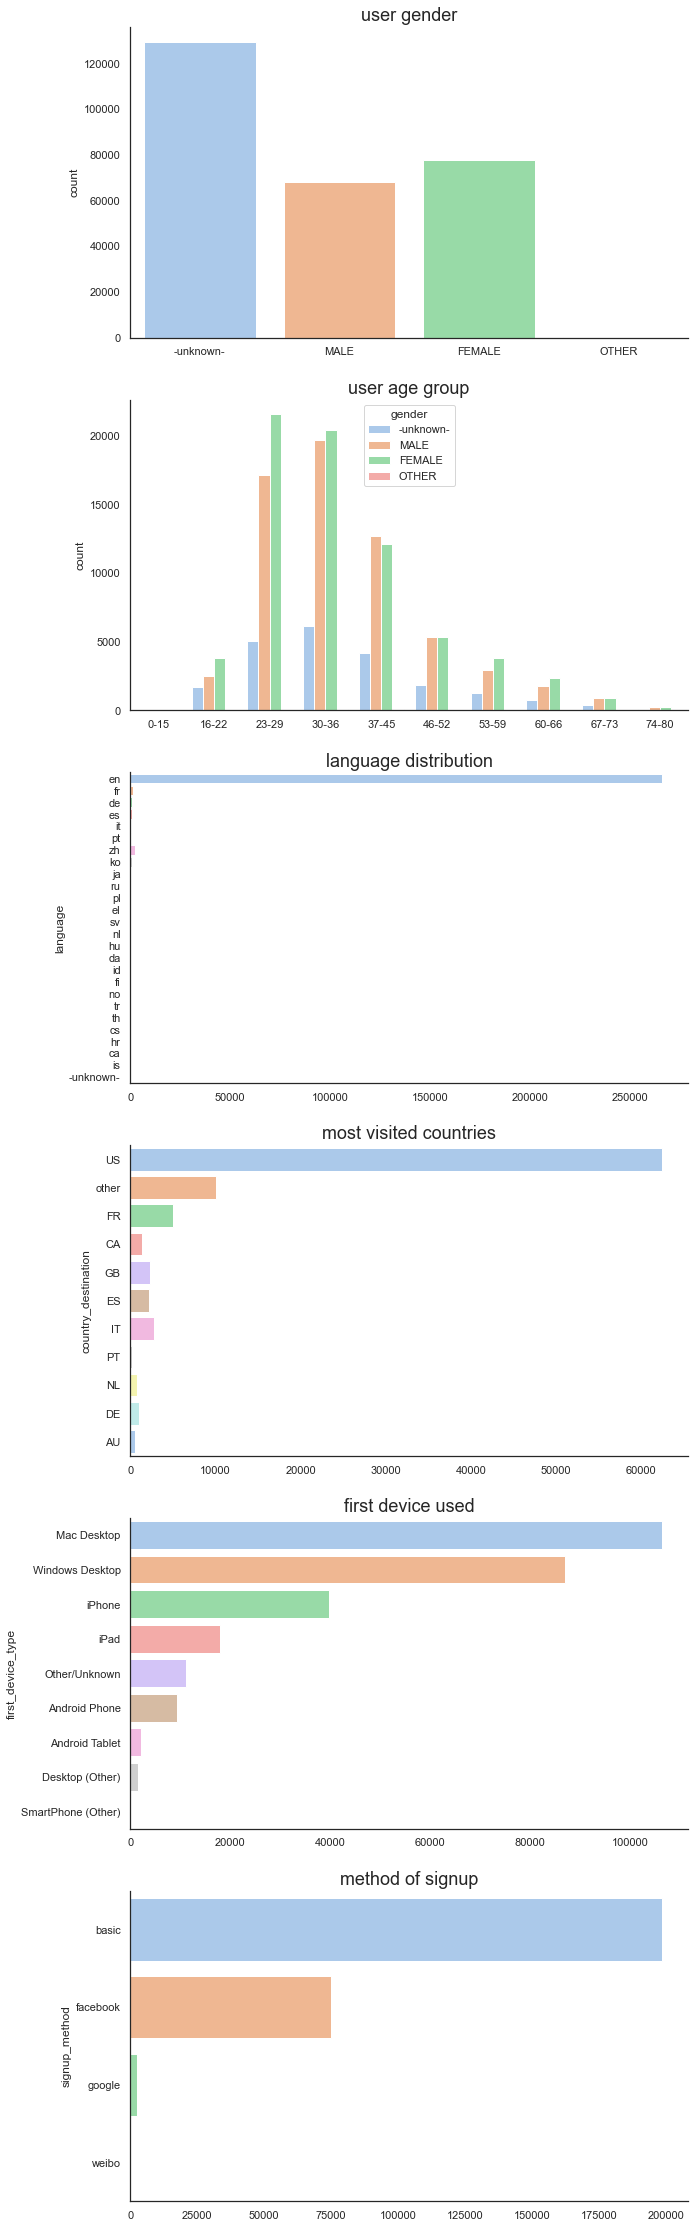

In [8]:
f,[ax1,ax2,ax3,ax4,ax5,ax6]=plt.subplots(6,1,figsize=(10,40))
#gender
sns.countplot(user['gender'],ax=ax1,palette=sns.color_palette('pastel'))
#divide age into different age groups 
bins=[0,15,22,29,36,45,52,59,66,73,80]
labels=['0-15','16-22','23-29','30-36','37-45','46-52','53-59','60-66','67-73','74-80']
user['age_group']=pd.cut(user['age'],bins=bins,labels=labels)
sns.countplot(x='age_group',hue='gender',data=user,ax=ax2,palette=sns.color_palette('pastel'))
# sources of users based on language 
sns.countplot(y='language',data=user,ax=ax3,palette=sns.color_palette('pastel'))
#most visited countries 
sns.countplot(y='country_destination',data=user[user['country_destination']!='NDF'],ax=ax4,palette=sns.color_palette('pastel'))
#device in order
sns.countplot(y='first_device_type',data=user,order=user['first_device_type'].value_counts().index,ax=ax5,palette=sns.color_palette('pastel'))
#sign_up method 
sns.countplot(y='signup_method',data=user,order=user['signup_method'].value_counts().index,ax=ax6,palette=sns.color_palette('pastel'))

#set title
ax1.set_title('user gender',fontsize=18)
ax1.set(xlabel=None)
ax2.set_title('user age group',fontsize=18)
ax2.set(xlabel=None)
ax3.set_title('language distribution',fontsize=18)
ax3.set(xlabel=None)
ax4.set_title('most visited countries',fontsize=18)
ax4.set(xlabel=None)
ax5.set_title('first device used',fontsize=18)
ax5.set(xlabel=None)
ax6.set_title('method of signup',fontsize=18)
ax6.set(xlabel=None)
sns.despine()


### Summary of user profile 
1. Based on existing data, there is no big gender difference. 
2. Users are mainly in age group 23-36, followed by age group 37-45. It is also worth noting that there is a big gender difference in age group 23-29 with more women using Airbnb.
3. It can be seen that users are widely distributed based on language, but English is the dominant language. Chinese is also active. 
4. US is the most popular countries. Next came France and Italy. 
5. As for the device used, users mainly use desktop, with more using Mac; Similarly, more people use iPhone and iPad than Android Phone.

### Suggestions
1. Based on gender, age and destination, we can target users through appropriate advertising and promotion. For example, for the most active age group 23-29, we can further analyse their characteristics, such as job, salary range, travel budget and plan, travel habits and other behaviors to determine the content of advertisement, where to put it and how to encourage them to share more. 
2. It is good to see Airbnb is used worldwide, but the markets aside from English markets are still needed to explore. China as an emerging market can be referred to when expanding developing countries. 
3. It is worth exploring why users prefer desktop rather than smart phones which is much more convenient. One possible reason can be that it is much more clear to check out details of the accomodation/easier to talk with hosts. A survey can be done to make it clear and followed improvements can be made on the app. 
4. Facebook is a popular method to sign up and this may be due  to 1. it is easier to sign up 2.Users get to know Airbnb from Facebook. Therefore, it is worth making full use of Facebook by encouraging sharing/advertising etc. 


### user growth 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


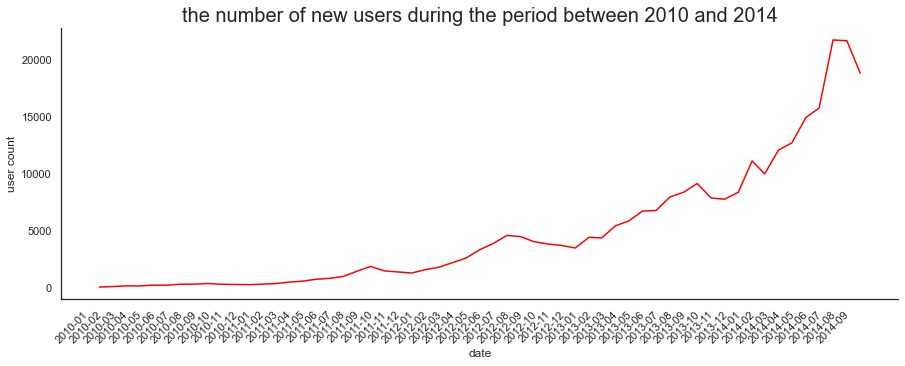

In [9]:
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format. Will be clear in Screenshot

f,ax=plt.subplots(figsize=(15,5))
user['date_account_created']=pd.to_datetime(user['date_account_created'])
user_growth=user.groupby(pd.Grouper(key='date_account_created',freq='m'))['id'].count()
user_growth={'date':user_growth.index,'user count':user_growth.values}
user_growth=pd.DataFrame(user_growth)
sns.lineplot(x='date',y='user count',data=user_growth,color='red')\
    .set_xticklabels(labels=user_growth['date'].dt.strftime('%Y-%m'))

ax.xaxis.set_major_locator(months)
plt.xticks(rotation = 45)
ax.set_title('the number of new users during the period between 2010 and 2014',fontsize=20)
sns.despine()

#### Description 
1.The number of users kept increasing. More specifially, there was a slight increase in 2011 and a more considerable rise can be found in 2012 and 2013. The year 2014 witnessed a dramatic increase. 

2.There was a noticeable climb each year, normally starting from July and ending in October. 

#### Suggestions 

1.Further investigation on business activities in each year can be done to see what works for  business growth. 
2.The growth can also be divided into different countries. 
3.As for the climb each year, the possible reason is that people tend to travel during summer. Therefore, there can be some advertisement, marketing and promotion to target those users. 

### Channel analysis

<AxesSubplot:xlabel='count', ylabel='channel_provider'>

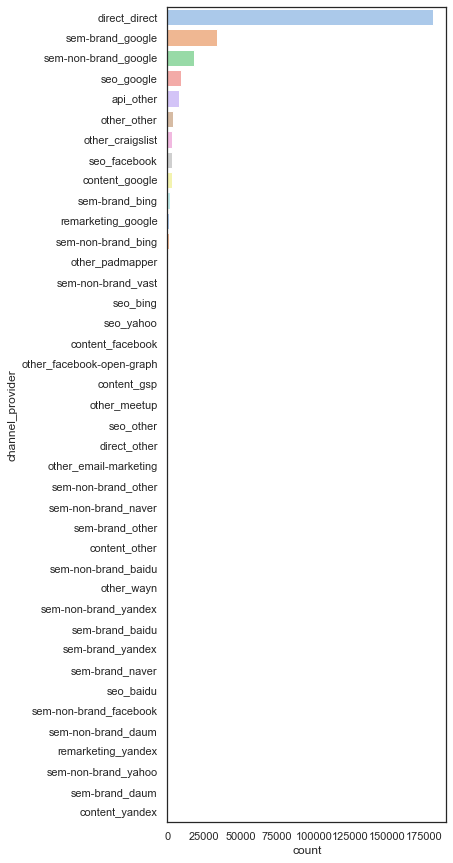

In [10]:
#Firstly, link channel to its provider 
user['channel_provider']=user['affiliate_channel'].str.cat(user['affiliate_provider'],sep='_')

#Traffic
f,ax=plt.subplots(figsize=(5,15))
sns.countplot(y='channel_provider',data=user,palette=sns.color_palette('pastel'),order=user['channel_provider'].value_counts().index)

In [12]:
#Conversion rate 
conversion=user.groupby('channel_provider')['id'].count().to_frame()
conversion['book']=user.groupby('channel_provider')['date_first_booking'].count()
conversion['rate']=conversion['book']/conversion['id']

conversion.sort_values(['id','rate'],ascending=False).head(20)

,id,book,rate
channel_provider,,,
direct_direct,181270,59234,0.326772
sem-brand_google,34273,10705,0.312345
sem-non-brand_google,18092,6516,0.360159
seo_google,9282,2739,0.295087
api_other,8167,2785,0.341006
other_other,4034,1508,0.373823
other_craigslist,3475,1616,0.465036
seo_facebook,3394,724,0.213318
content_google,3043,451,0.148209


### Description 
1.Biggest traffic came from direct, but it's also worh noting that SEM-Brand from Google and SEM-Non-Brand from Google as well as SEO from Google also contributed to the traffic, and their conversion rate was similar, at around 30%. 

2.Channels with less vists but high conversion rate: other_craigslist,sem-non-brand from bing, other from padmapper, sem-non-brand-vast and sem-brand & sem-non-brand from baidu. 

### Suggestions 
1.It is no surpring that Google contributed a lot to traffic since it was leading search engine. With a good conversion rate in SEM-brand,SEM-non Brand and SEO, they should be configured to maxmize ROI. And it is also to be noted that the content from Google was just 14%. 

2.We also need to pay attention to other providers and channels, especially those specific to an area, such as in China, Baidu is the source and craigslist is popular among new yorkers. 



### User Behavior Analysis 
Funnel Analysis 

In [13]:
# Firstly, we join the session with user so that we can gain a deeper insight. 

user_behavior=pd.merge(session,user1,left_on='user_id',right_on='id')

In [14]:
session.action_detail.unique()
#We will build a funnel based on action_detail: all users,users who have signed up,  users who booked (reservation),users who paid (payment_instruments),users who paid more than once (payment_instruments>2)
all_users=session.groupby('user_id')['user_id'].count().shape[0]
signup_user=user_behavior.groupby('user_id')['user_id'].count().to_frame().shape[0]
booking_user=session[session['action_detail']=='reservations'].groupby('user_id')['user_id'].count().to_frame().shape[0]
payment_user=session[session['action_detail']=='payment_instruments'].groupby('user_id')['user_id'].count().to_frame().shape[0]
repay_count=session[session['action_detail']=='payment_instruments'].groupby('user_id')['user_id'].count().to_frame()
repay_user=repay_count[repay_count['user_id']>=2].shape[0]

rates=pd.Series({'all_users':all_users,'signup':signup_user,'booking':booking_user,'payment':payment_user,'repay':repay_user},name='users').to_frame()
rates['conversion_rate']=rates['users'].apply(lambda x: round(x*100/rates.iloc[0,0],2))
rates

,users,conversion_rate
all_users,135483,100.00
signup,73815,54.48
booking,10366,7.65
payment,9018,6.66
repay,4151,3.06


In [15]:
from pyecharts.charts import Funnel 
from pyecharts import options as opts

In [18]:
c=(Funnel(init_opts=opts.InitOpts(js_host="https://cdn.bootcss.com/echarts/4.4.0-rc.1/")).add('conversion_rate',[list (z) for z in zip(rates.index,rates['conversion_rate'])],
              label_opts=opts.LabelOpts(position='inside',formatter='{b}:{c}')
              ).set_global_opts(title_opts=opts.TitleOpts(title='conversion_rate(%)')))
c.render_notebook()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


### Description 
1.The biggest loss was the conversion from signup to booking.   
2.Most people would pay after they booked.    
3.Repay rate was relatively high, almost 50%.   

### Suggestions 
1.Further user behavior analysis should be done to find why users did not pay. This can be analyzed by their action and elaspsed time.   
2.We should find why payment was not completed and see whether it has something to do with our product or the process.   
3.We can invite those who paid more than twice to share their stories via different channels and maybe use coupon as an incentive.     